In [7]:
###imports###
import numpy as np
import tensorflow as tf
import scipy.io
from scipy import io
import time
import sys
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing import image
from tensorflow.python.framework import graph_util
from tensorflow.keras.callbacks import TensorBoard
import tensorflow_datasets as tfds
import pickle
import datetime
import time
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
from sklearn.preprocessing import OneHotEncoder
import logging
#import skimage.io
import random
import PIL
from pathlib import Path
from keras.models import Model
import shutil


In [ ]:
builder = tfds.ImageFolder('path/to/image_dir/')
  print(builder.info)  # num examples, labels... are automatically calculated
  ds = builder.as_dataset(split='train', shuffle_files=True)
  tfds.show_examples(ds, builder.info)

In [8]:
builder = tfds.ImageFolder('E:/Github/thesis/flowerDataset/new_dataset/')
print(builder.info)

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='E:/Github/thesis/flowerDataset/new_dataset/',
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=102),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=2048, num_shards=1>,
        'train': <SplitInfo num_examples=6141, num_shards=1>,
        'val': <SplitInfo num_examples=1965, num_shards=1>,
    },
    citation="""""",
)


In [11]:
ds=builder.as_dataset()

In [12]:
train_set, test_set, val_set = ds['train'], ds['test'], ds['val']

In [13]:
train_set

<PrefetchDataset shapes: {image: (None, None, 3), image/filename: (), label: ()}, types: {image: tf.uint8, image/filename: tf.string, label: tf.int64}>

In [33]:
num_training_examples = 0
num_validation_examples = 0
num_test_examples = 0

for example in train_set:
    num_training_examples += 1

for example in val_set:
    num_validation_examples += 1

for example in test_set:
    num_test_examples += 1

print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {}'.format(num_validation_examples))
print('Total Number of Test Images: {} \n'.format(num_test_examples))
# TODO: Get the number of classes in the dataset from the dataset info.


Total Number of Training Images: 6141
Total Number of Validation Images: 1965
Total Number of Test Images: 2048 



In [34]:
# TODO: Create a pipeline for each set.
IMAGE_RES = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
    return image, label

BATCH_SIZE = 32

train_batches = train_set.cache().shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)

validation_batches = val_set.cache().map(format_image).batch(BATCH_SIZE).prefetch(1)

test_batches = test_set.cache().map(format_image).batch(BATCH_SIZE).prefetch(1)

TypeError: in user code:


    TypeError: tf__format_image() missing 1 required positional argument: 'label'


In [ ]:
# TODO: Build and train your network.
from tensorflow.keras import layers
# Create a Feature Extractor
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES, 3))
# Freeze the Pre-Trained Model
feature_extractor.trainable = False
# Attach a classification head
model = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

In [ ]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

EPOCHS = 20

# Stop training when there is no improvement in the validation loss for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches,
                    callbacks=[early_stopping])

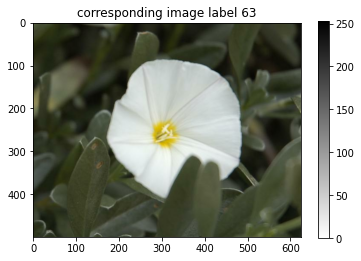

In [29]:
image = image.numpy()
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title('corresponding image label {}'.format(label))
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
ds = train_set.take(1)

In [28]:
for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
    print(list(example.keys()))
    image = example["image"]
    label = example["label"]
    print(image.shape, label)

['image', 'image/filename', 'label']
(500, 625, 3) tf.Tensor(63, shape=(), dtype=int64)
